In [20]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier

In [21]:
data=pd.read_csv('column_2c_weka.csv')

In [22]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [23]:
data.shape

(310, 7)

In [24]:
print('No of coloumens in the dataset',data.columns.size)
print('name of columns in data set\n',data.columns.values )

No of coloumens in the dataset 7
name of columns in data set
 ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


#### To check about Numerical/ Categorical columns

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


#### Summary of the data

In [26]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


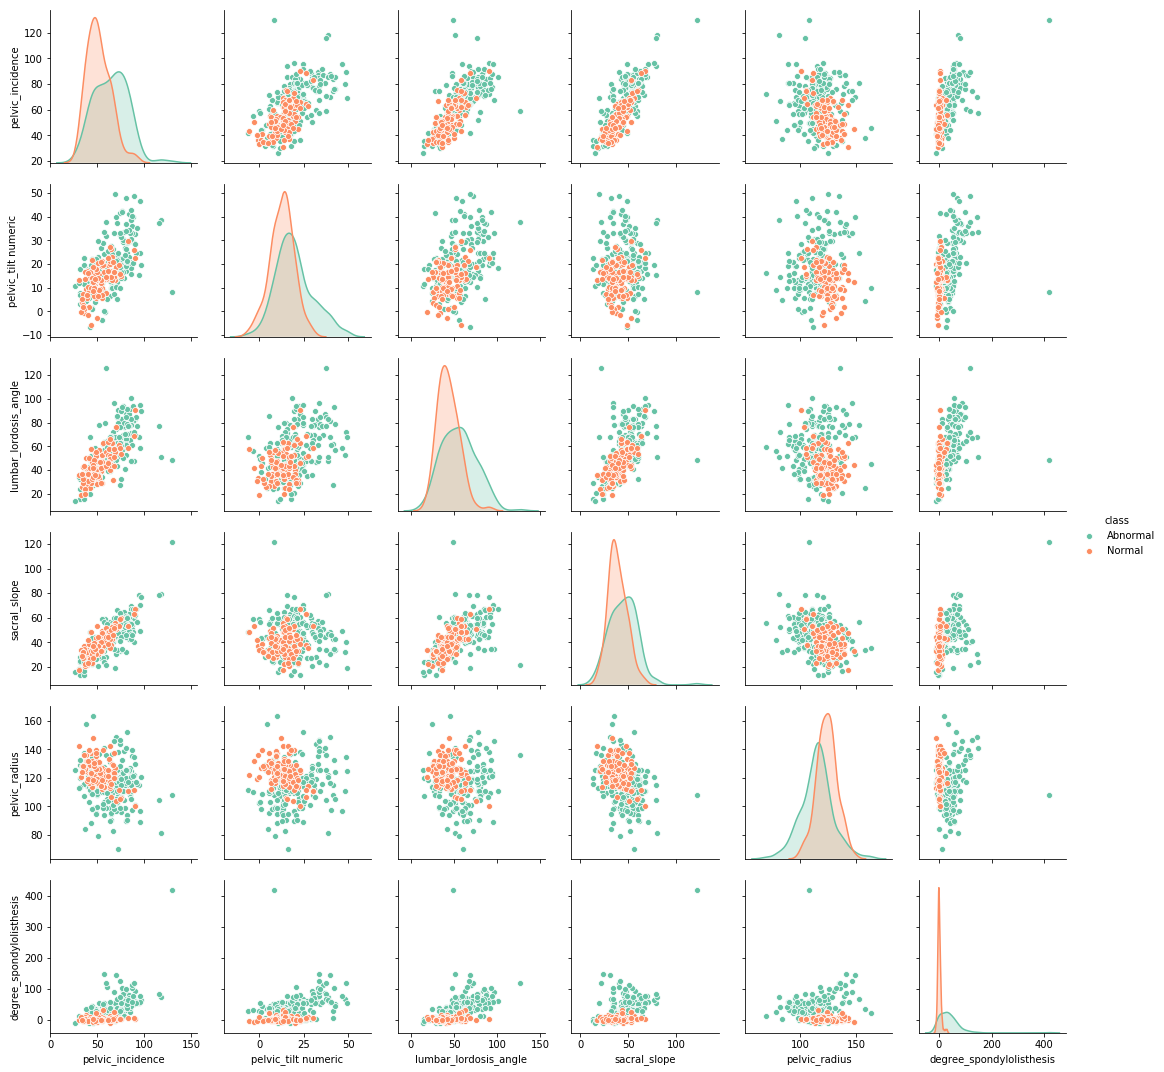

In [27]:
sns.pairplot(data,hue='class',palette='Set2')
plt.show()

In [28]:
data.loc[:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

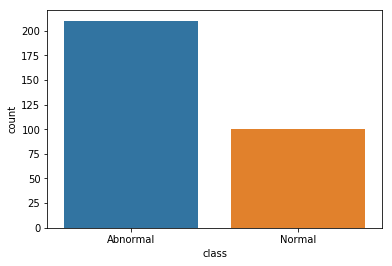

In [29]:
sns.countplot(x='class',data=data)

### KNN

In [35]:

knn =KNeighborsClassifier(n_neighbors=3)
x,y=data.loc[:,data.columns !='class'],data.loc[:,'class']
knn.fit(x,y)
prediction=knn.predict(x)
print('with KNN (k=3) accuracy is', knn.score(x,y))

with KNN (k=3) accuracy is 0.9258064516129032


#### Measuring model performance:

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5, stratify=y)

In [46]:
knn=KNeighborsClassifier(n_neighbors=3)
x,y=data.loc[:,data.columns !='class'],data.loc[:,'class']
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print('with KNN (k=3) accuracy is', knn.score(x_test,y_test))

with KNN (k=3) accuracy is 0.7526881720430108


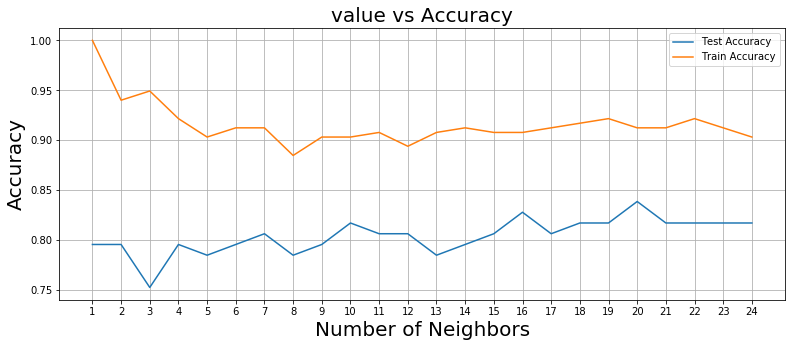

Best accuracy is0.8387096774193549 with k=20


In [53]:
# model complexity
neig=np.arange(1,25)
train_accuracy=[]
test_accuracy=[]
#loop for different value for k
for i,k in enumerate(neig):
    #k from 1 to 25(exclude)
    knn=KNeighborsClassifier(n_neighbors=k)
    #fit with KNN
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    #test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
#plot
plt.figure(figsize=[13,5])
plt.plot(neig,test_accuracy,label='Test Accuracy')
plt.plot(neig,train_accuracy,label='Train Accuracy')
plt.legend()
plt.title('value vs Accuracy', fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print('Best accuracy is{} with k={}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


In [54]:
knn=KNeighborsClassifier(n_neighbors=12,p=6,metric='minkowski')
knn.fit(x_train,y_train)
print('The accuracy of the knn classifier is{:.2f} out of 1 on training data'. format(knn.score(x_train,y_train)))
print('The accuracy of the knn classifier is{:.2f} out of 1 on testing data'. format(knn.score(x_test,y_test)))

The accuracy of the knn classifier is0.90 out of 1 on training data
The accuracy of the knn classifier is0.83 out of 1 on testing data
